In [62]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
# warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("../data/caesarian_section.csv")

In [64]:
df.head()

,Age,Delivery_Number,Delivery_Time,Blood_Of_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [65]:
target = 'Caesarian'
y = df[target]
X = df.drop(target, axis=1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1111)

In [67]:
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [68]:
logreg = LogisticRegression()

In [69]:
params = { 
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
    'C': np.logspace(-4, 4, 10), 
    'penalty': ['l1', 'l2']
    
    } 

grid_logreg = GridSearchCV(logreg, param_grid=params, cv=5)

In [70]:
grid_logreg.fit(X_train,y_train)
logreg = grid_logreg.best_estimator_
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
accuracy_score(y_test, y_pred_logreg)

0.75

In [71]:
grid_logreg.best_estimator_

LogisticRegression(C=166.81005372000558, solver='newton-cg')

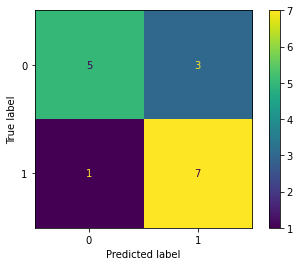

In [72]:
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot()

## Decision Tree Classifier

In [73]:
dt = DecisionTreeClassifier(random_state=111)

In [74]:
params_dt = { 
'criterion': ['gini','entrpy'], 
'min_samples_leaf': [1,2,3,4,5,6],
'max_depth': range(1,15,1),
} 

grid_dt = GridSearchCV(dt, param_grid=params_dt , cv=4)

In [75]:
grid_dt.fit(X_train,y_train)
dt = grid_dt.best_estimator_
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_score(y_test, y_pred_dt)

0.75

In [76]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=111)

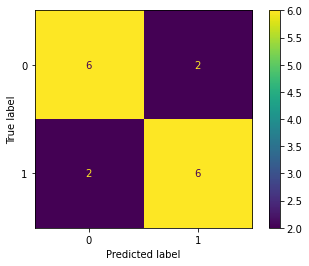

In [77]:
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()

In [78]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 111,
 'splitter': 'best'}

## Random Forest Classifier

In [79]:
rf = RandomForestClassifier(random_state=111)

In [80]:
params_rf = { 
'criterion': ['gini','entrpy'], 
'min_samples_leaf': [1,2],
'max_depth': [1,2,3],
'max_features': ['sqrt', 'log2', None],
'n_estimators': [100,300],
} 

In [81]:
grid_rf = GridSearchCV(rf , cv=5 , param_grid=params_rf)

In [82]:
grid_rf.fit(X_train,y_train)
rf = grid_rf.best_estimator_
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_score(y_test, y_pred_rf)

0.625

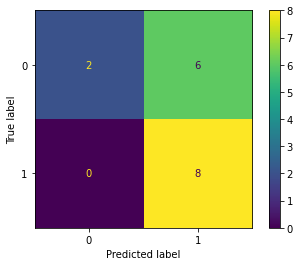

In [83]:
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot()

In [84]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

In [85]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=1, min_samples_leaf=2, n_estimators=300,
                       random_state=111)

# ENSEMBLE LEARNING

## VOTING METOTHODE

In [86]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier

## AdaBoost Classifier

In [87]:
ada = AdaBoostClassifier(base_estimator=rf)

In [88]:
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
cm_ada = confusion_matrix(y_test, y_pred_ada)
accuracy_score(y_test, y_pred_ada)

0.5625

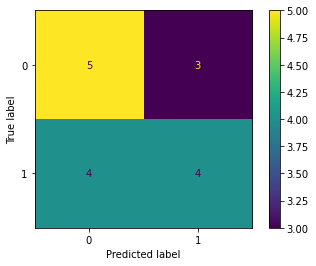

In [89]:
ConfusionMatrixDisplay(confusion_matrix=cm_ada).plot()

## Gradient Boosting Classifier

In [90]:
gbc = GradientBoostingClassifier(random_state=111, criterion='squared_error')

In [91]:
params_gbc = { 

    'n_estimators': [30,40,50,100], 
    'learning_rate': [0.1,0.5,1.0], 
    'min_samples_leaf': [1,2,3],
    
}

In [92]:
grid_gbc = GridSearchCV(gbc,params_gbc, cv=4 )

In [93]:
grid_gbc.fit(X_train,y_train)
gbc = grid_gbc.best_estimator_
y_pred_gbc = gbc.predict(X_test)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
accuracy_score(y_test, y_pred_gbc)

0.6875

In [94]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 111,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [95]:
gbc

GradientBoostingClassifier(criterion='squared_error', min_samples_leaf=3,
                           n_estimators=50, random_state=111)

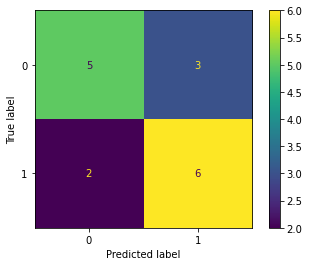

In [96]:
ConfusionMatrixDisplay(confusion_matrix=cm_gbc).plot()

In [97]:
classifier =  [ 
    ('decisiontree',dt), 
    ('logisticregression',logreg), 
    ('randomforest',rf)
]

In [98]:
vc = VotingClassifier(estimators=classifier)

In [99]:
vc.fit(X_train,y_train)
y_pred_vc = vc.predict(X_test)
cm_vc = confusion_matrix(y_test, y_pred_vc)
accuracy_score(y_test, y_pred_vc)

0.75

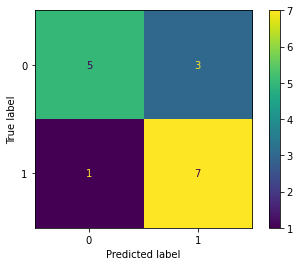

In [100]:
ConfusionMatrixDisplay(confusion_matrix=cm_vc).plot()

In [101]:
df.head()

,Age,Delivery_Number,Delivery_Time,Blood_Of_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [102]:
vc.predict([[30,5,1,2,1]])

array([1])

# saving model

In [103]:
import joblib

In [104]:
# joblib.dump(vc, '../../ml_models/CaesarianModel_voting_models_0_1_0.joblib')

['../../ml_models/CaesarianModel_voting_models_0_1_0.joblib']

In [105]:
# model = joblib.load('../../ml_models/CaesarianModel_voting_models_0_1_0.joblib')
# model.predict([[16,1,2,2,0]])

array([0])

In [106]:
# model.predict([[34,3,1,1,0]])

array([1])

In [107]:

joblib.dump(logreg, '../../ml_models/CaesarianModel_logisticregre_models_0_1_0.joblib')

['../../ml_models/CaesarianModel_logisticregre_models_0_1_0.joblib']

In [108]:
model = joblib.load('../../ml_models/CaesarianModel_logisticregre_models_0_1_0.joblib')


In [109]:
logreg.predict([[16,1,2,2,0]])

array([0])

In [110]:
logreg.predict([[34,3,1,1,0]])

array([1])

In [111]:
dt

DecisionTreeClassifier(max_depth=2, random_state=111)

In [112]:

# joblib.dump(dt, '../../ml_models/CaesarianModel_decisionTreeClf_models_0_1_0.joblib')

['../../ml_models/CaesarianModel_decisionTreeClf_models_0_1_0.joblib']

In [113]:
# dt_model = joblib.load('../../ml_models/CaesarianModel_decisionTreeClf_models_0_1_0.joblib')


In [114]:
# logreg.predict([[16,1,2,2,0]])

array([0])

In [115]:
# logreg.predict([[34,3,1,1,0]])

array([1])